# Проект анализа A/B теста интернет магазина.

# Описание проекта

Вы — аналитик крупного интернет-магазина. Вместе с отделом маркетинга вы подготовили список гипотез для увеличения выручки.

Приоритизируйте гипотезы, запустите A/B-тест и проанализируйте результаты.

# Шаг 1. Приоритизация гипотез.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import datetime as dt
from IPython.display import display

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

data = pd.read_csv('https://code.s3.yandex.net/datasets/hypothesis.csv', sep=',')

pd.set_option('display.max_columns', None)
pd.options.display.max_colwidth = 150
display(data.head(10))

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [2]:
data['ICE'] = (data['Impact'] * data['Confidence']) / data['Efforts']
ice = data[['Hypothesis', 'ICE']]
display(ice.sort_values(by='ICE', ascending=False).round(1))

,Hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.2
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.1
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.0


По методу приоретизациии задач ICE гипотезы 8,0 и 7 наиболее перспективны. Гипотезы 1,5,3 и 4 не в приоритете.

In [3]:
data['RICE'] = (data['Reach'] * data['Impact'] * data['Confidence']) / data['Efforts']
rice = data[['Hypothesis', 'RICE']]
display(rice.sort_values(by='RICE', ascending=False))

,Hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


In [30]:
total = ice.merge(rice, on='Hypothesis')
display(total.sort_values(by='RICE', ascending=False).round(1).style.background_gradient('coolwarm'))

,Hypothesis,ICE,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.200000,112.000000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.000000,56.000000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.300000,40.000000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.000000,40.000000
8,"Запустить акцию, дающую скидку на товар в день рождения",16.200000,16.200000
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.100000,9.000000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.000000,4.000000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.300000,4.000000
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.000000,3.000000


По методу приоретизациии задач RICE гипотеза 7 явный лидер, а гипотезы 2,0 и 6 также перспективны. Гипотезы 3,1,5 и 4 как и с методом ICE не в приоритете.

**Вывод по приоретизации гипотезы:**

Гипотеза (7) - добавления формы подписки на все основные страницы и гипотеза (0) - добавления двух новых каналов привлечения трафика имеют имеют самый большой приоритет, т.к показатели ICE и RICE высоки.

Также вполне рабочие гипотезы: гипотеза (2) - добавить блоки рекомендаций товаров на сайт интернет магазина и гипотеза (6) - показать на главной странице баннеры с актуальными акциями и распродажами у данных гипотез высокие показатели RICE за счёт reach. Гипотезу (8) - запустить акцию, дающую скидку на товар в день рождения, тоже можно считать рабочей т.к показатель ICE у неё наибольший. 
Остальные гипотезы явно не в приоритете.

# Шаг 2. Анализ A/B-теста.

In [5]:
orders = pd.read_csv('https://code.s3.yandex.net/datasets/orders.csv', sep=',')
#такой вариант не работает
#orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x, '%d/%m/%Y'))
orders['date'] = pd.to_datetime(orders['date'], format= '%Y-%m-%d')
display(orders.head())
display(orders.info())

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   int64         
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


None

In [6]:
#определим период когда делали заказы
print(orders['date'].min())
print(orders['date'].max())
#определяем дубликаты
print(orders.duplicated().sum())

2019-08-01 00:00:00
2019-08-31 00:00:00
0


In [7]:
#число уникальных пользователей
unique_visitor = (orders.groupby('visitorId').agg({'group':'nunique'})).reset_index()
print(unique_visitor.count())
#число пользователей сделавших заказ в двух группах
no_unique_visitor = unique_visitor.query('group > 1').reset_index()
print(no_unique_visitor.count())

visitorId    1031
group        1031
dtype: int64
index        58
visitorId    58
group        58
dtype: int64


In [8]:
visitors = pd.read_csv('https://code.s3.yandex.net/datasets/visitors.csv', sep=',')
#такой вариант не работает
#visitors['date'] = visitors['date'].map(lambda x: dt.datetime.strptime(x, '%Y/%m/%d'))
visitors['date'] = pd.to_datetime(visitors['date'], format= '%Y-%m-%d')
display(visitors.head())
display(visitors.info())

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


None

In [9]:
#определим период когда заходили посетители
print(visitors['date'].min())
print(visitors['date'].max())
#определяем дубликаты
print(visitors.duplicated().sum())

2019-08-01 00:00:00
2019-08-31 00:00:00
0


**Вывод по преобработке данных:**

Всего записей по 1197 заказам у 1031 уникального пользователя. Совсем небольшая доля 58 пользователей сделали заказ в группах А и В. Удалять данных пользователей считаю не нужно, т.к не совсем известно сколько визитов сделали данные пользователи перед покупкой, при этом количество пользователей в обеих группах небольшое и не должно кардинально изменить ситуацию. Данные представлены за август 19 года. В данных остутсвуют дубликаты и пропуски. Дата имеет тип данных - object, перевели столбец в datetime.  

# 2.1 График кумулятивной выручки по группам.

In [10]:
#создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date', 'group']].drop_duplicates()
#cоберём агрегированные кумулятивные по дням данные
ordersAggregated = datesGroups.apply(
    lambda x: orders[
        np.logical_and(
            orders['date'] <= x['date'], orders['group'] == x['group']
        )
    ].agg(
        {
            'date': 'max',
            'group': 'max',
            'transactionId': pd.Series.nunique,
            'visitorId': pd.Series.nunique,
            'revenue': 'sum',
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])

visitorsAggregated = datesGroups.apply(
    lambda x: visitors[
        np.logical_and(
            visitors['date'] <= x['date'], visitors['group'] == x['group']
        )
    ].agg({'date': 'max', 'group': 'max', 'visitors': 'sum'}),
    axis=1,
).sort_values(by=['date', 'group'])
#объединяем в одну таблицу и переминовываем столбцы
cumulativeData = ordersAggregated.merge(
    visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group']
)
cumulativeData.columns = [
    'date',
    'group',
    'orders',
    'buyers',
    'revenue',
    'visitors',
]

display(cumulativeData.head(5))

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845


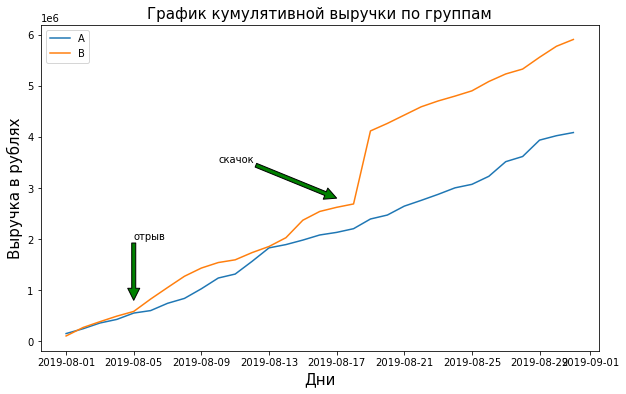

In [11]:
#строим графики кумулятивной выручки по группам
#создаем датафреймы с кумулятивным количеством заказов и кумулятивной выручкой
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]
#Строим график выручки
plt.figure(figsize=(10, 6))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.title('График кумулятивной выручки по группам', fontsize=15)
plt.ylabel('Выручка в рублях', fontsize=15)
plt.xlabel('Дни', fontsize=15)
plt.annotate('скачок', xy=('2019-08-17', 2800000), xytext=('2019-08-10', 3500000),
            arrowprops=dict(facecolor='g'))
plt.annotate('отрыв', xy=('2019-08-05', 800000), xytext=('2019-08-05', 2000000),
            arrowprops=dict(facecolor='g'))
plt.legend()
plt.show()

**Вывод по кумулятивной выручке по группам:**

До середины теста выручка групп А и В примерно равномерно растёт, но в середине теста идёт активый рост выручки у группы В. Вероятно на это влияют аномально большие заказы.

# 2.2 График кумулятивного среднего чека по группам.

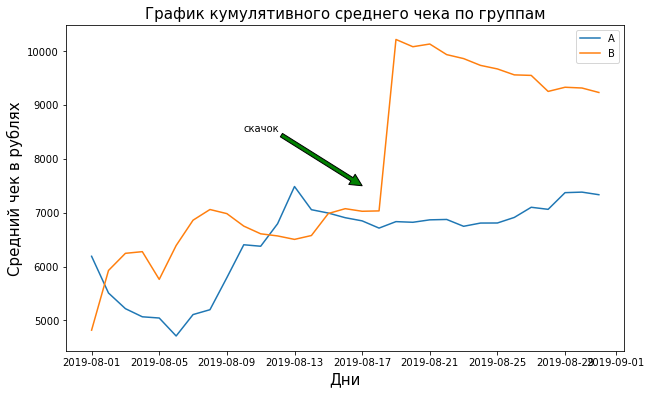

In [12]:
#строим график кумулятивного среднего чека по группам
plt.figure(figsize=(10, 6))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.title('График кумулятивного среднего чека по группам', fontsize=15)
plt.ylabel('Средний чек в рублях', fontsize=15)
plt.xlabel('Дни', fontsize=15)
plt.annotate('скачок', xy=('2019-08-17', 7500), xytext=('2019-08-10', 8500),
            arrowprops=dict(facecolor='g'))
plt.legend()
plt.show()

**Вывод кумулятивного среднего чека по группам:**

Данные среднего чека у групп А и B сильно отличаются, а в середине теста средний чек группы B резко растёт, как и в случае с выручкой. Требуется дополнительный анализ выбросов, чтобы определить подобную разницу.

# 2.3 График относительного изменения кумулятивного среднего чека.

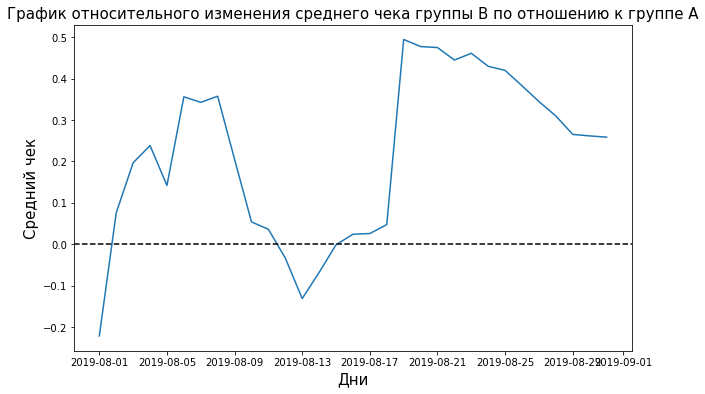

In [13]:
#объединяем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, 
                                                   left_on='date', 
                                                   right_on='date', 
                                                   how='left', 
                                                   suffixes=['A', 'B'])
#строим график относительного изменения кумулятивного среднего чека
plt.figure(figsize=(10, 6))
plt.plot(mergedCumulativeRevenue['date'], 
         (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

plt.axhline(y=0, color='black', linestyle='--')
plt.title('График относительного изменения среднего чека группы В по отношению к группе А', fontsize=15)
plt.ylabel('Средний чек', fontsize=15)
plt.xlabel('Дни', fontsize=15)
plt.show()

**Вывод относительного изменения кумулятивного среднего чека:**

По данному графику видно, что присутвуют аномально резкие скачки. Явно присутсвуют выбросы с которыми нужно работать.

# 2.4 График кумулятивной конверсии.

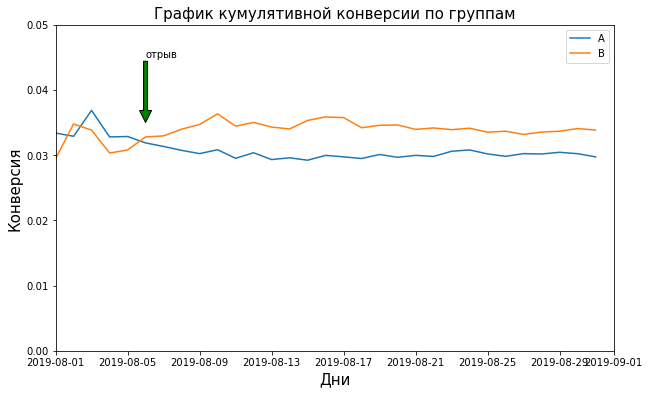

In [14]:
# считаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

#строим график кумулятивной конверсии
plt.figure(figsize=(10, 6))
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.title('График кумулятивной конверсии по группам', fontsize=15)
plt.ylabel('Конверсия', fontsize=15)
plt.xlabel('Дни', fontsize=15)
plt.annotate('отрыв', xy=('2019-08-06', 0.035), xytext=('2019-08-06', 0.045),
            arrowprops=dict(facecolor='g'))
plt.legend()

plt.axis(['2019-08-01', '2019-09-01', 0, 0.05])
plt.show()

**Вывод по графику кумулятивной конверсии:**

В самом начале данные идут примерно одинаково, но затем значения группы B фиксируются и становятся больше, чем значения группы А.

# 2.5 График относительного изменения кумулятивной конверсии.

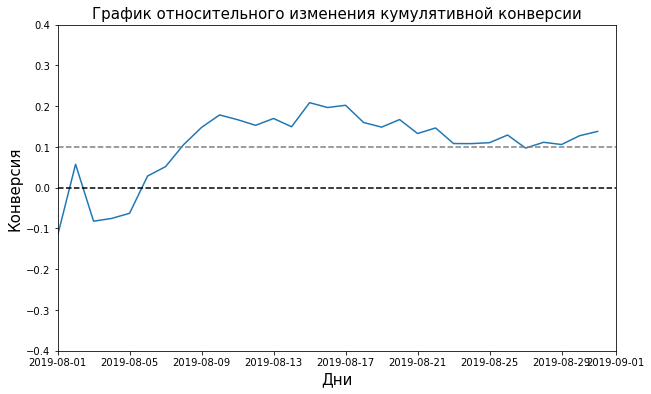

In [15]:
#объединяем в отдельном датафрейме
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], 
                                                                           left_on='date', 
                                                                           right_on='date', 
                                                                           how='left', 
                                                                           suffixes=['A', 'B'])
#строим график относительного изменения кумулятивной конверсии
plt.figure(figsize=(10, 6))
plt.plot(mergedCumulativeConversions['date'], 
         mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1)

plt.title('График относительного изменения кумулятивной конверсии', fontsize=15)
plt.ylabel('Конверсия', fontsize=15)
plt.xlabel('Дни', fontsize=15)

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.1, color='grey', linestyle='--')
plt.axis(['2019-08-01', '2019-09-01', -0.4, 0.4])
plt.show()

**Вывод по графику относительного изменения кумулятивной конверсии:**

Практически на протяжении всего теста группа В лидирует по конверсии. Прирост по отношению к группе А небольшой примерно в 10%.

# 2.6 Точечный график количества заказов.

,visitorId,orders
1023,4256040402,11
591,2458001652,11
569,2378935119,9
487,2038680547,8
44,199603092,5
744,3062433592,5
55,237748145,5
917,3803269165,5
299,1230306981,5
897,3717692402,5


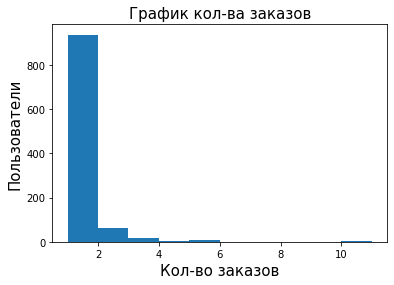

In [16]:
#группируем пользователей по
ordersByUsers = (
    orders.drop(['group', 'revenue', 'date'], axis=1)
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsers.columns = ['visitorId', 'orders']
display(ordersByUsers.sort_values(by='orders', ascending=False).head(10))

plt.hist(ordersByUsers['orders'])
plt.title('График кол-ва заказов', fontsize=15)
plt.ylabel('Пользователи', fontsize=15)
plt.xlabel('Кол-во заказов', fontsize=15)
plt.show()

Большинство пользователей сделали сделали по 1 заказу. Посмотрим на данные точечным графиком.

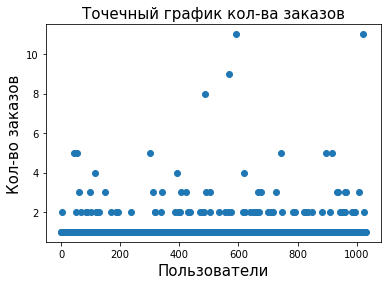

In [17]:
#строим точечный график
x_values = pd.Series(range(0, len(ordersByUsers)))
plt.scatter(x_values, ordersByUsers['orders'])
plt.title('Точечный график кол-ва заказов', fontsize=15)
plt.ylabel('Кол-во заказов', fontsize=15)
plt.xlabel('Пользователи', fontsize=15)
plt.show()

**Вывод по точечному графику количества заказов:**

Подавляющее большинство сделали по 1 заказу, заказов более 2 совсем мало, считаем их аномальными.
Чтобы определить нормальное ли количество в 2 заказа, посчитаем выборочные перцентили.

# 2.7 Выборочные перцентили для количества заказов.

In [18]:
display(ordersByUsers.sort_values(by='orders', ascending=False).head(10))
print(np.percentile(ordersByUsers['orders'], [90, 95, 99]))

,visitorId,orders
1023,4256040402,11
591,2458001652,11
569,2378935119,9
487,2038680547,8
44,199603092,5
744,3062433592,5
55,237748145,5
917,3803269165,5
299,1230306981,5
897,3717692402,5


[1. 2. 4.]


**Вывод по перцентелям количества заказов:**

Не более 5% пользователей делали более 2 заказов и не более 1% делали 4 заказа. Нижней границей оставляем 2 заказа, все что больше отсекаем.

# 2.8 Точечный график стоимости заказов.

      transactionId   visitorId       date  revenue group
425       590470918  1920142716 2019-08-19  1294500     B
1196     3936777065  2108080724 2019-08-15   202740     B
858       192721366  1316129916 2019-08-27    93940     A
1136      666610489  1307669133 2019-08-13    92550     A
744      3668308183   888512513 2019-08-27    86620     B
682      1216533772  4266935830 2019-08-29    78990     B
662      1811671147  4266935830 2019-08-29    78990     A
743      3603576309  4133034833 2019-08-09    67990     A
1103     1348774318  1164614297 2019-08-12    66350     A
1099      316924019   148427295 2019-08-12    65710     A


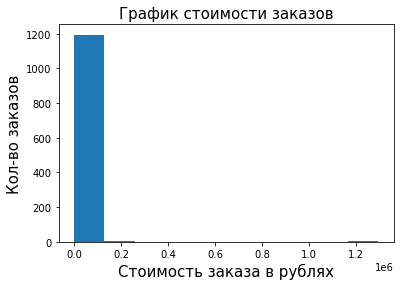

In [19]:
print(orders.sort_values(by='revenue', ascending=False).head(10))

plt.hist(orders['revenue'])
plt.title('График стоимости заказов', fontsize=15)
plt.ylabel('Кол-во заказов', fontsize=15)
plt.xlabel('Стоимость заказа в рублях', fontsize=15)
plt.show()

Сумма большинства заказов не превышает 150000 рублей. Но по данному графику сложно увидеть аномальные выбросы. Посмотрим с помощью точечного графика.

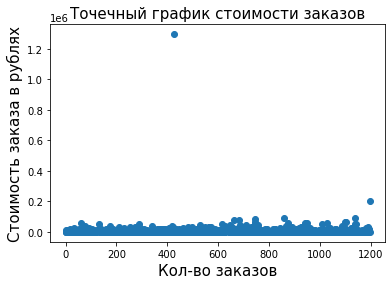

In [20]:
#строим точечный график
x_values = pd.Series(range(0, len(orders['revenue'])))
plt.scatter(x_values, orders['revenue'])
plt.title('Точечный график стоимости заказов', fontsize=15)
plt.ylabel('Стоимость заказа в рублях', fontsize=15)
plt.xlabel('Кол-во заказов', fontsize=15)
plt.show()

**Вывод по точечному графику стоимости заказов:**

На графике явно заметен аномальный заказ свыше 1 миллиона рублей, этот выброс явно нам не нужен. Также выделяется заказ на 200000 рублей, определим с помощью выборочных перцентилей оставлять ли его.

# 2.9 Выборочные перцентили для стоимости заказов.

In [21]:
print(orders.head(10))
print(np.percentile(orders['revenue'], [90, 95, 99]))

   transactionId   visitorId       date  revenue group
0     3667963787  3312258926 2019-08-15     1650     B
1     2804400009  3642806036 2019-08-15      730     B
2     2961555356  4069496402 2019-08-15      400     A
3     3797467345  1196621759 2019-08-15     9759     B
4     2282983706  2322279887 2019-08-15     2308     B
5      182168103   935554773 2019-08-15     2210     B
6      398296753  2900797465 2019-08-15     1860     B
7     2626614568    78758296 2019-08-15     1044     A
8     1576988021   295230930 2019-08-15    13710     A
9     1506739906  1882260405 2019-08-15     1855     B
[18168.  28000.  58233.2]


**Вывод по перцентелям стоимости заказов:**

Не более чем у 5% заказ больше 28000 рублей, и не больше чему у 1% заказ дороже 58233 рублей.
Можем смело отсеить заказы стоимостью свыше 50000 рублей.

# 2.10 Статистическая значимость различий в конверсии между группами по «сырым» данным.

In [22]:
#находим пользователей по датам для группы А
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']
#находим пользователей по датам для группы В
visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']
#находим кол-во заказов и вырручки по дате для группы А
ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']
#находим кумулятивные заказы и выручку по дате для группы А
ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

#находим кол-во заказов и вырручки по дате для группы В
ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']
#находим кумулятивные заказы и выручку по дате для группы В
ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]
#создаём общий датафрейм
data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

display(data.head(5)) 

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,24,148579,21,101217,24,148579,21,101217,719,713,719,713
1,2019-08-02,20,93822,24,165531,44,242401,45,266748,619,581,1338,1294
2,2019-08-03,24,112473,16,114248,68,354874,61,380996,507,509,1845,1803
3,2019-08-04,16,70825,17,108571,84,425699,78,489567,717,770,2562,2573
4,2019-08-05,25,124218,23,92428,109,549917,101,581995,756,707,3318,3280


**Формируем гипотезу:**

1. Нулевая гипотеза: Доли между групп А и В равные;
2. Обратная гипотеза: Между долями групп А и В присутсвует разница.

In [23]:
# находим совершённые заказы для пользователей покупавших хоть раз.
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitorId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitorId', 'orders']

#находим количество заказов для каждого из пользователей
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)
#рассчитываем статистическую значимость с помощью метода mannwhitneyu
print("{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB, alternative = 'two-sided')[1]))

print("{0:.3f}".format((data['ordersPerDateB'].sum()/data['visitorsPerDateB'].sum())/(data['ordersPerDateA'].sum()/data['visitorsPerDateA'].sum())-1))

0.017
0.138


**Вывод:**

P-value меньше 0.05 поэтому отвергаем нулевую гипотезу. По анализу сырых данных есть статистичеки значимые различия в конверсии. Прирост конверсии группы В относительно группы А - 13.8%

# 2.11 Статистическая значимость различий среднего чека между группами по «сырым» данным.

In [24]:
print('{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'], alternative = 'two-sided')[1]))
print('{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

0.729
0.259


**Вывод:**

P-value значительно больше 0.05 причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. Впрочем, средний чек группы B значительно больше среднего чека группы A на 25.9%
Необходимо посмотреть на очищенные от аномалий данные.

# 2.12 Статистическая значимость различий в конверсии между группами по «очищенным» данным.

In [25]:
#находим множество аномальных пользователей
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 2]['visitorId'],
        ordersByUsersB[ordersByUsersB['orders'] > 2]['visitorId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > 50000]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
display(abnormalUsers.head(5))
display(abnormalUsers.shape)

1099    148427295
18      199603092
23      237748145
37      249864742
68      457167155
Name: visitorId, dtype: int64

(37,)

Всего таких пользователей 37

In [26]:
#находим статистическую значимость различий в конверсии между группами теста по очищенным данным
#создаём выборки количества заказов по пользователям групп теста
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)
# применяем статистический критерий Манна-Уитни
print('{0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered, alternative = 'two-sided')[1]))
print('{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 

0.008
0.182


**Вывод:**

Как и в случае с сырыми данными, статистическая значимость достигнута. Группа В имеет значительный прирост в конверсии в 18.2%

# 2.13 Статистическая значимость различий среднего чека между группами по «очищенным» данным.

In [27]:
print(
    '{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'], alternative = 'two-sided'
        )[1]
    )
)

print(
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
) 

0.940
0.019


**Вывод:**

P-value увеличился, но благодаря отсутсвию аномальных данных, разница между сегментами сократилась с 26% до 2%. Различий по среднему чеку в группах А и В не обнаружено.

# Выводы по A/B тестированию.

**По конверсии** между группами А и В есть статистичеки значимые различия по сырым и очищенным данным. Конверсия группы В по сырым данным больше на 13.8% и больше на 18.2% по очищенным. Что является существенным ростом.

**По среднему чеку** между группами А и В нет статистичеки значимых различий. Хотя по сырым данным есть большой рост группы А почти на 26%, но это благодаря аномальным значениям, при отсекании аномалий, рост группы В по среднему чеку составляет уже 2%. 

# Общий вывод.

**Среди наиболее приритетных гипотез мы можем выделить:**

Добавить формы подписки на все основные страницы;
Добавить два новых канала привлечения трафика.

**Также следует отметить достаточно важные гипотезы:** 

Добавить блоки рекомендаций товаров на сайт интернет магазина;
Показать на главной странице баннеры с актуальными акциями и распродажами;
Запустить акцию, дающую скидку на товар в день рождения.

**Анализ данных:**

По графикам кумулятивной выручки и среднего чека присутсвует отрыв группы В практически с самого начала, а в середине происходит стремительный скачок за счёт аномального заказа.

По графику кумулятивной конверсии видно, что с самого начала месяца группа В имеет отрыв от группы А.

В качестве аномалий мы определили заказы больше 2 от одного покупателя и стоимость заказов свыше 50000 рублей.

**Вывод по А/Б тесту:**

Конверсия группы В по сырым данным больше на 13.8% и больше на 18.2% по очищенным. Что является существенным ростом. Метод Манна-Уитни показал статистически значемые различия между группами А и В.

Средний чек группы В вырос на 26 % по сырым данным, но убрав аномалии в очищенных данных рост оказался не таким существенным, всего 2%. Метод Манна-Уитни не показал статистически значемых различий между группами А и В.

**Исходя из того, что рост конверсии группы В существенно вырос по сравнению с группой А, а рост среднего чека незначительно увеличился, тест можно остановить и признать успешным.**